In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='/media/pesong/e/dl_gaussian/data/coco/images'

dataType='train'
annFile='/media/pesong/e/dl_gaussian/data/coco/annotations/instances_{}2017.json'.format(dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...


Done (t=16.14s)
creating index...


index created!


In [3]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format('.  '.join(nms))) 

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person.  bicycle.  car.  motorcycle.  airplane.  bus.  train.  truck.  boat.  traffic light.  fire hydrant.  stop sign.  parking meter.  bench.  bird.  cat.  dog.  horse.  sheep.  cow.  elephant.  bear.  zebra.  giraffe.  backpack.  umbrella.  handbag.  tie.  suitcase.  frisbee.  skis.  snowboard.  sports ball.  kite.  baseball bat.  baseball glove.  skateboard.  surfboard.  tennis racket.  bottle.  wine glass.  cup.  fork.  knife.  spoon.  bowl.  banana.  apple.  sandwich.  orange.  broccoli.  carrot.  hot dog.  pizza.  donut.  cake.  chair.  couch.  potted plant.  bed.  dining table.  toilet.  tv.  laptop.  mouse.  remote.  keyboard.  cell phone.  microwave.  oven.  toaster.  sink.  refrigerator.  book.  clock.  vase.  scissors.  teddy bear.  hair drier.  toothbrush



[]
149
000000000149.jpg


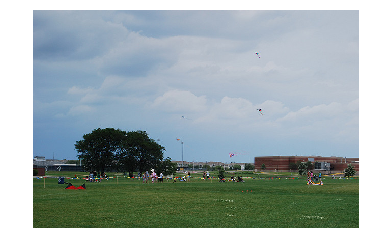

In [4]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['road'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds=[149])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(str(img['id']))

# load and display image
print(img['file_name'])
I = io.imread('%s/%s2017/%s'%(dataDir, dataType ,img['file_name']))
# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[466969, 479044, 498873, 565048, 624446, 625580, 625780, 626694, 1211297, 1236095, 1342984, 1352349, 1353295, 1354648, 1465587, 1465889, 1722473, 1754846, 1757856, 1760699, 1761013, 1763461, 900100000149]
[1, 1, 1, 1, 38, 38, 38, 38, 1, 1, 3, 3, 3, 3, 38, 38, 1, 1, 1, 1, 1, 1, 1]


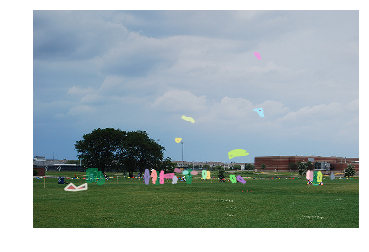

In [6]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
print(annIds)
anns = coco.loadAnns(annIds)
# anns = anns[2:3]
# print(anns)
print([ann['category_id'] for ann in anns])
# print([ann['bbox'] for ann in anns ])

coco.showAnns(anns)